#Telecom Churn Case Study

# Objective:

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

# Steps Followed :

1. Load and inspect data by importing necessary libraries and dataset.
2. EDA and feature engineering.(This step involves handling missing values,visualization, creating relevant features, removing outliers,deriving churn )
3. Model building and evaluation.(This step involves keeping the relevant feature using pca and applying random forest and logistic regresion and finally choosing the best fit model for our objective and finally getting the important feature predicting the churn).

# Step: 1 Load and Inspect Data

In [217]:
# import the required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [218]:
# import the dataset and set the width to visualize the max rows and columns upto 1000
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
data=pd.read_csv('/content/telecom_churn_data.csv')

In [219]:
# top 5 rows
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [220]:
#shape of the data
data.shape

(99999, 226)

In [221]:
# checking missing values in the dataset
data.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [222]:
# create backup of data
original = data.copy()

# Step:2 EDA and feature Engineering

2.1. Let's segreggate the columns like id, date, category and recharge columns so that it will be easy for analysis

In [223]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6',
             'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6',
             'date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9']
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',]

num_cols = [column for column in data.columns if column not in id_cols + date_cols + cat_cols]

In [224]:
# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))


#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8


In [225]:
# checking the distribution of all recharge columns
data[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


2.2 Based on above,,we will impute the values of recharge column with zero where nan is present meaning they didn't recharged

In [226]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [227]:
# impute missing values with 0
data[zero_impute] = data[zero_impute].apply(lambda x: x.fillna(0))

In [228]:
# Dropping the columns
data = data.drop(id_cols + date_cols, axis=1)
data.shape

(99999, 212)

In [229]:
# replace missing values with '-1' in categorical columns
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(-1))

2.3 Removing missing values more than 70% in the dataset.

In [230]:
MISSING_THRESHOLD = 0.7

include_cols = list(data.apply(lambda column: True if column.isnull().sum()/data.shape[0] < MISSING_THRESHOLD else False))
drop_missing = pd.DataFrame({'features':data.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [231]:
# replacing missing values with zeros specifically in columns of the DataFrame data that do not have data types 'datetime64[ns]' or 'category'.
data[data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = data[data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [232]:
#checking shape of the data
data.shape

(99999, 212)

In [233]:
# checking missing values
data.isnull().sum()

loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8    

2.4. Checking whether the indices of null values in two specific columns, total_rech_data_X and av_rech_amt_data_X, where X represents the month (6, 7, or 8), match or not. It is performed for three different months (June, July, and August)

In [234]:
# Get the index of null vals for both columns and verify if both matches
# if the result is false it means all rows of total_rech_data and av_rech_amt_data has null at same rows.
res = data.total_rech_data_6[data.total_rech_data_6.isna()].index != data.av_rech_amt_data_6[data.av_rech_amt_data_6.isna()].index
print('June :', res.any())
res = data.total_rech_data_7[data.total_rech_data_7.isna()].index != data.av_rech_amt_data_7[data.av_rech_amt_data_7.isna()].index
print('July :', res.any())
res =data.total_rech_data_8[data.total_rech_data_8.isna()].index != data.av_rech_amt_data_8[data.av_rech_amt_data_8.isna()].index
print('Aug :', res.any())

June : False
July : False
Aug : False


With the above test now we know that if total_rech_data is null then av_rech_amt_data is also null

2.5 Deriving new varibales total recharge and data for 6 and 7 month average.

In [235]:
# let's add a new derived variable total recharge amount for data: total_rech_amt_data
data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7

In [236]:
# Total recharge amount for June and July
data['amt_data_6'] = data.total_rech_amt_6 + data.total_data_rech_6
data['amt_data_7'] = data.total_rech_amt_7 + data.total_data_rech_7

In [237]:
# average recharge done by customer in June and July
data['av_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

In [238]:
data[['av_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].head()

,av_amt_data_6_7,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7
0,559.0,252.0,252.0,614.0,504.0
1,306.0,0.0,154.0,74.0,538.0
2,241.5,0.0,0.0,168.0,315.0
3,270.0,0.0,0.0,230.0,310.0
4,301.0,56.0,0.0,252.0,350.0


In [239]:
# 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(data.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


2.6 Based on the above results we can see that 487 is our minumum limit. now based on this value we will derive our high valued customers.

In [240]:
# Extracting High value customers where total average recharge amount for good phase > 70th percentile
high_val_cust = data.loc[data.av_amt_data_6_7 > data.av_amt_data_6_7.quantile(0.7), :]
high_val_cust = high_val_cust.reset_index(drop=True)
high_val_cust.shape

(29953, 217)

In [241]:
# checking if any missing values present
high_val_cust.isnull().sum()[high_val_cust.isnull().sum() > 0]

Series([], dtype: int64)

In [242]:
# Churn Derivation
#  total incoming and outgoing minutes of usage
high_val_cust['total_calls_mou_9'] = high_val_cust.total_ic_mou_9 + high_val_cust.total_og_mou_9
#     2g and 3g data consumption
high_val_cust['total_internet_mb_9'] =  high_val_cust.vol_2g_mb_9 + high_val_cust.vol_3g_mb_9

In [243]:
#Tag churners and remove attributes of the churn phase
#Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

#The attributes you need to use to tag churners are:

#total_ic_mou_9
#total_og_mou_9
#vol_2g_mb_9
#vol_3g_mb_9
# Those who have not used either calls or internet in  September are churned customers

# Let's denote 0 as not churn and  1 as churn
high_val_cust['churn'] = high_val_cust.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)
# verify that the churn is tagged correctly
high_val_cust[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,churn,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,1,0.00,0.00,0.00,0.00
1,1,0.00,0.00,0.00,0.00
2,0,34.91,142.18,0.00,0.00
3,0,252.61,1031.53,0.00,0.00
4,0,127.48,127.63,13.93,314.74
...,...,...,...,...,...
29948,0,391.63,64.21,0.00,0.00
29949,0,149.26,14.44,723.41,232.56
29950,0,547.11,1095.24,9.14,941.48
29951,0,265.84,182.16,0.05,393.34


In [244]:
#After defining the y variable by tagging churners delete the columns having _9 attribute in their name
#After tagging churners, remove all the attributes corresponding to the churn phase
#(all attributes having ‘ _9’, etc. in their names).
#Get the list of columns which has name ends with _9 attribute
# find the columns which has name ends with _9 attribute
month_9_cols = high_val_cust.columns[high_val_cust.columns.str.endswith(pat = '_9')]
print("The columns names ends with _9 are given below...")
month_9_cols

The columns names ends with _9 are given below...


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user

In [245]:
# so, deleting derived variables
high_val_cust = high_val_cust.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)
# change data type to category
high_val_cust.churn = high_val_cust.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(high_val_cust.churn.value_counts()*100/high_val_cust.shape[0])

Churn Ratio:
0    91.877274
1     8.122726
Name: churn, dtype: float64


2.7  We see that approx. 8.1% of high value customers have churned
now we will calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [246]:
# creating the new differenced variable
high_val_cust['arpu_diff'] = high_val_cust.arpu_8 - ((high_val_cust.arpu_6 + high_val_cust.arpu_7)/2)
high_val_cust['onnet_mou_diff'] = high_val_cust.onnet_mou_8 - ((high_val_cust.onnet_mou_6 + high_val_cust.onnet_mou_7)/2)
high_val_cust['offnet_mou_diff'] = high_val_cust.offnet_mou_8 - ((high_val_cust.offnet_mou_6 + high_val_cust.offnet_mou_7)/2)
high_val_cust['roam_ic_mou_diff'] = high_val_cust.roam_ic_mou_8 - ((high_val_cust.roam_ic_mou_6 + high_val_cust.roam_ic_mou_7)/2)
high_val_cust['roam_og_mou_diff'] = high_val_cust.roam_og_mou_8 - ((high_val_cust.roam_og_mou_6 + high_val_cust.roam_og_mou_7)/2)
high_val_cust['loc_og_mou_diff'] = high_val_cust.loc_og_mou_8 - ((high_val_cust.loc_og_mou_6 + high_val_cust.loc_og_mou_7)/2)
high_val_cust['std_og_mou_diff'] = high_val_cust.std_og_mou_8 - ((high_val_cust.std_og_mou_6 + high_val_cust.std_og_mou_7)/2)
high_val_cust['isd_og_mou_diff'] = high_val_cust.isd_og_mou_8 - ((high_val_cust.isd_og_mou_6 + high_val_cust.isd_og_mou_7)/2)
high_val_cust['spl_og_mou_diff'] = high_val_cust.spl_og_mou_8 - ((high_val_cust.spl_og_mou_6 + high_val_cust.spl_og_mou_7)/2)
high_val_cust['total_og_mou_diff'] = high_val_cust.total_og_mou_8 - ((high_val_cust.total_og_mou_6 + high_val_cust.total_og_mou_7)/2)
high_val_cust['loc_ic_mou_diff'] = high_val_cust.loc_ic_mou_8 - ((high_val_cust.loc_ic_mou_6 + high_val_cust.loc_ic_mou_7)/2)
high_val_cust['std_ic_mou_diff'] = high_val_cust.std_ic_mou_8 - ((high_val_cust.std_ic_mou_6 + high_val_cust.std_ic_mou_7)/2)
high_val_cust['isd_ic_mou_diff'] = high_val_cust.isd_ic_mou_8 - ((high_val_cust.isd_ic_mou_6 + high_val_cust.isd_ic_mou_7)/2)
high_val_cust['spl_ic_mou_diff'] = high_val_cust.spl_ic_mou_8 - ((high_val_cust.spl_ic_mou_6 + high_val_cust.spl_ic_mou_7)/2)
high_val_cust['total_ic_mou_diff'] = high_val_cust.total_ic_mou_8 - ((high_val_cust.total_ic_mou_6 + high_val_cust.total_ic_mou_7)/2)
high_val_cust['total_rech_num_diff'] = high_val_cust.total_rech_num_8 - ((high_val_cust.total_rech_num_6 + high_val_cust.total_rech_num_7)/2)
high_val_cust['total_rech_amt_diff'] = high_val_cust.total_rech_amt_8 - ((high_val_cust.total_rech_amt_6 + high_val_cust.total_rech_amt_7)/2)
high_val_cust['max_rech_amt_diff'] = high_val_cust.max_rech_amt_8 - ((high_val_cust.max_rech_amt_6 + high_val_cust.max_rech_amt_7)/2)
high_val_cust['total_rech_data_diff'] = high_val_cust.total_rech_data_8 - ((high_val_cust.total_rech_data_6 + high_val_cust.total_rech_data_7)/2)
high_val_cust['max_rech_data_diff'] = high_val_cust.max_rech_data_8 - ((high_val_cust.max_rech_data_6 + high_val_cust.max_rech_data_7)/2)
high_val_cust['av_rech_amt_data_diff'] = high_val_cust.av_rech_amt_data_8 - ((high_val_cust.av_rech_amt_data_6 + high_val_cust.av_rech_amt_data_7)/2)
high_val_cust['vol_2g_mb_diff'] = high_val_cust.vol_2g_mb_8 - ((high_val_cust.vol_2g_mb_6 + high_val_cust.vol_2g_mb_7)/2)
high_val_cust['vol_3g_mb_diff'] = high_val_cust.vol_3g_mb_8 - ((high_val_cust.vol_3g_mb_6 + high_val_cust.vol_3g_mb_7)/2)

In [247]:
#  9th Month (churned month) Columns
col_9 =  high_val_cust.columns[high_val_cust.columns.str.contains('_9')]
#  all names ending with 9
col_9 = high_val_cust.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9]
cat_cols.append('churn')
num_cols = [col for col in high_val_cust.columns if col not in cat_cols]
# change column types
high_val_cust[num_cols] = high_val_cust[num_cols].apply(pd.to_numeric)
high_val_cust[cat_cols] = high_val_cust[cat_cols].apply(lambda column: column.astype("category"), axis=0)
#eda

2.8 visualizations

In [248]:
#  plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'

def univariate(variable, stats=True):

    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())

    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())

    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")

def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(x=var1, y=var2, data=df)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):
        sns.boxplot(x=var1, y=var2, data=data)

count    29953.000000
mean       558.820058
std        460.868223
min      -2258.709000
25%        310.142000
50%        482.354000
75%        700.240000
max      27731.088000
Name: arpu_6, dtype: float64


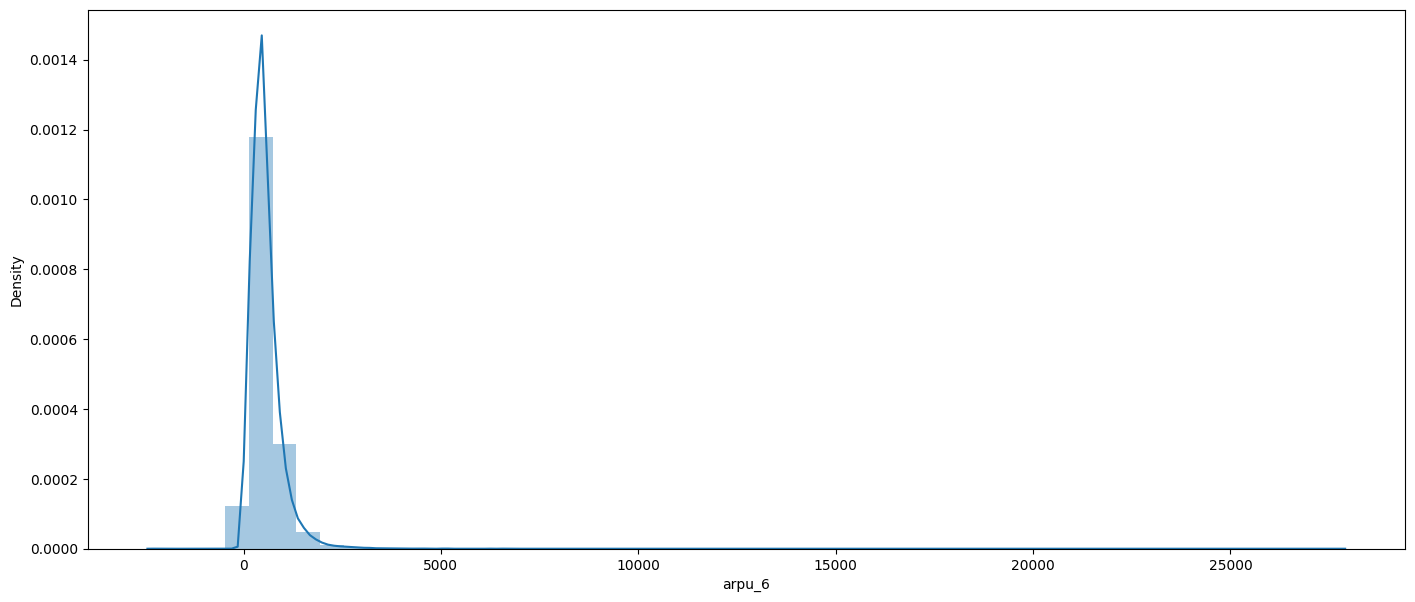

In [249]:
univariate(high_val_cust.arpu_6)

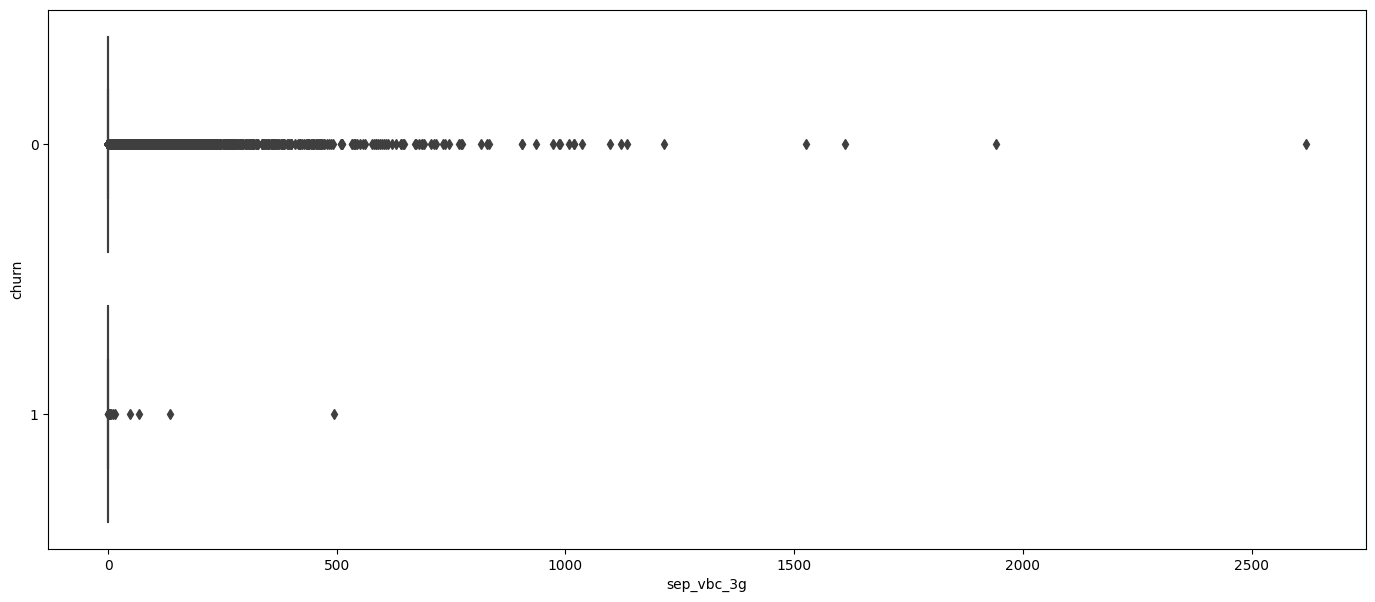

In [250]:
bivariate(high_val_cust.sep_vbc_3g, high_val_cust.churn)

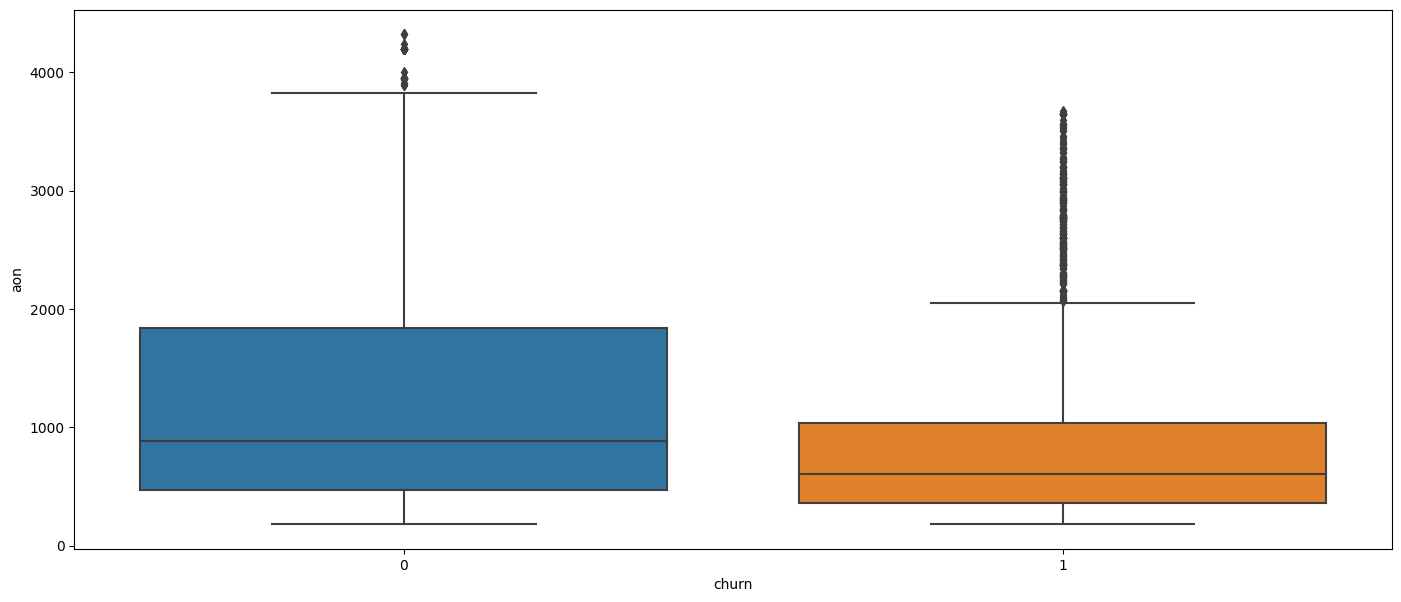

In [251]:
bivariate(high_val_cust.churn, high_val_cust.aon)

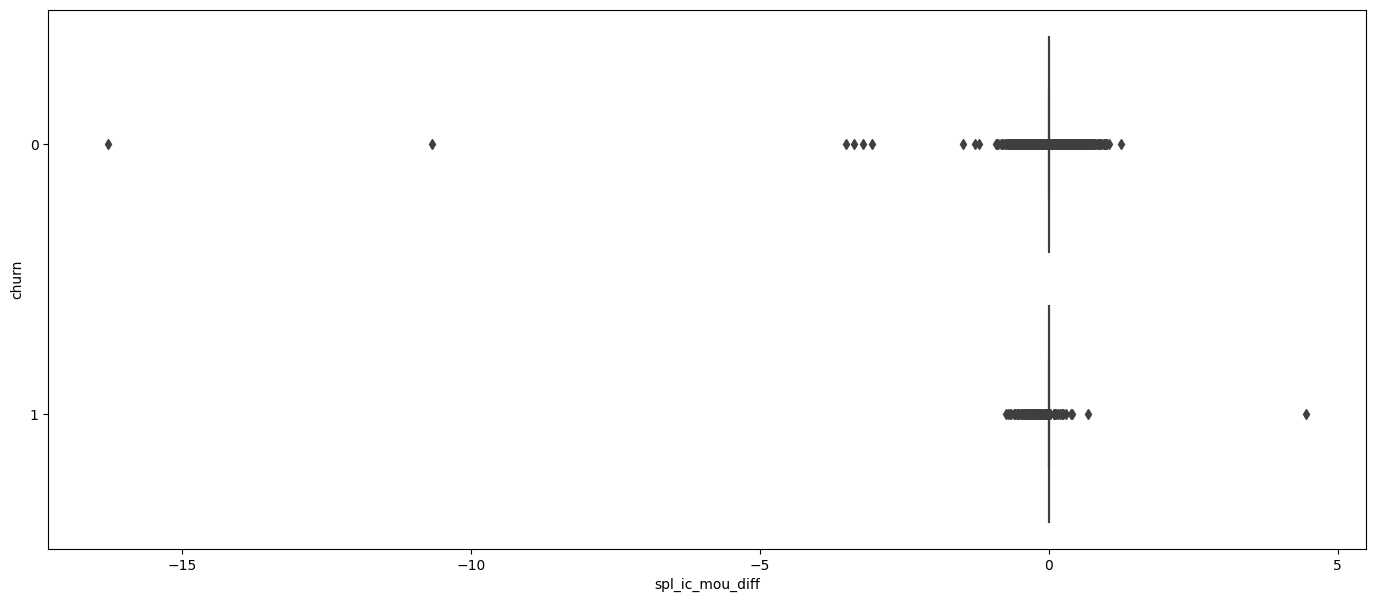

In [252]:
bivariate(high_val_cust.spl_ic_mou_diff, high_val_cust.churn)

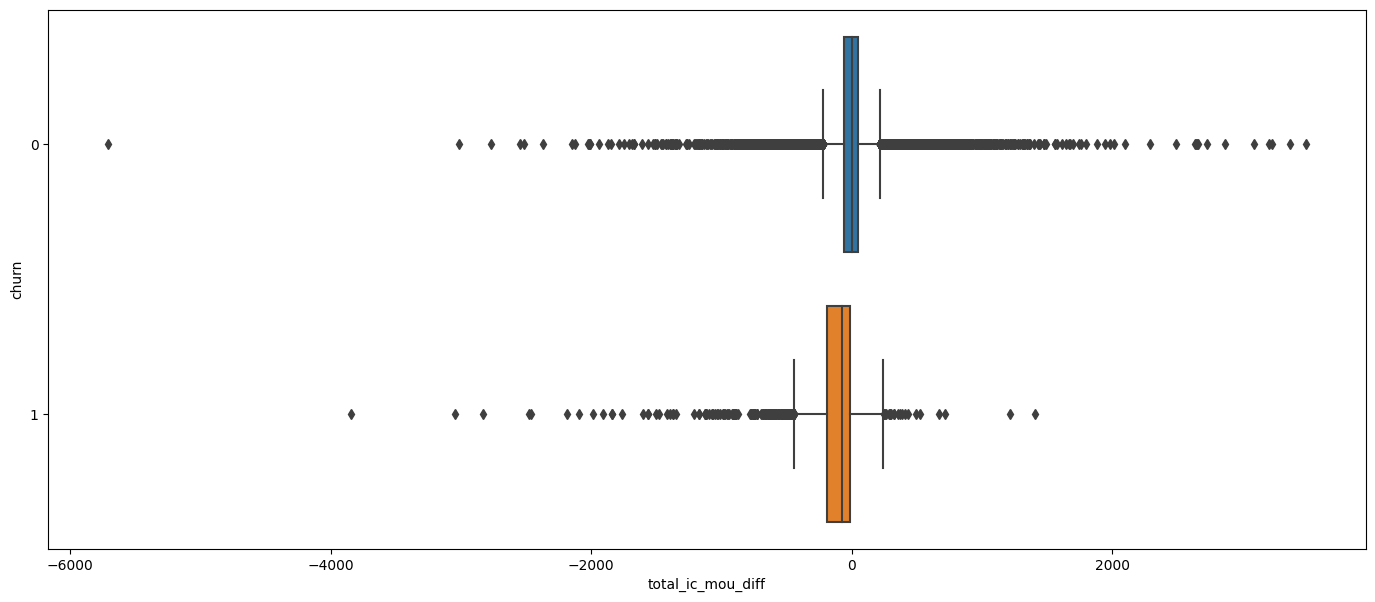

In [253]:
bivariate(high_val_cust.total_ic_mou_diff, high_val_cust.churn)

2.9 segreggating and analyzing numeric features using boxplots

In [254]:
print('Summary metrics - Numeric Variables')
numeric_df = (high_val_cust.iloc[:,0:20])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,20:40])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,40:60])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,60:80])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,80:100])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,100:120])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,120:140])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,140:160])._get_numeric_data()
print(numeric_df.describe())

Summary metrics - Numeric Variables
       loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         29953.0         29953.0         29953.0  29953.000000   
mean              0.0             0.0             0.0    558.820058   
std               0.0             0.0             0.0    460.868223   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0    310.142000   
50%               0.0             0.0             0.0    482.354000   
75%               0.0             0.0             0.0    700.240000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     561.160547    508.890301    467.446183    260.900880    268.051744   
std      480.028497    502.136278    501.837624    459.853278    480.303238   
min    -

In [255]:
# create function to anlyze the features across 6th, 7th and 8th month

def analyze_feature(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6, 7, 8]}
    print(cols)

    frame_data = []
    for churn in [0, 1]:
        churn_data = high_val_cust[high_val_cust["churn"] == churn]
        month_means = [churn_data[cols[c]].mean() for c in [6, 7, 8]]
        month_stds = [churn_data[cols[c]].std() for c in [6, 7, 8]]
        frame_data.append({
            "mean_6": month_means[0],
            "mean_7": month_means[1],
            "mean_8": month_means[2],
            "std_6": month_stds[0],
            "std_7": month_stds[1],
            "std_8": month_stds[2]
        })

    f, axes = plt.subplots(nrows=1, ncols=3)
    for i, month in enumerate([6, 7, 8]):
        sns.boxplot(data=high_val_cust, y=feature_start + "_" + str(month), x="churn",
                    hue="churn", linewidth=2.5, showfliers=False, ax=axes[i])

    return pd.DataFrame(frame_data, columns=["mean_6", "mean_7", "mean_8", "std_6", "std_7", "std_8"], index=["Non Churned", "Churned"]).round(2)


Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,649.97,663.89,613.98,547.95,574.45,615.04
Churned,787.33,627.46,253.69,682.48,668.66,452.97


<Figure size 1700x700 with 0 Axes>

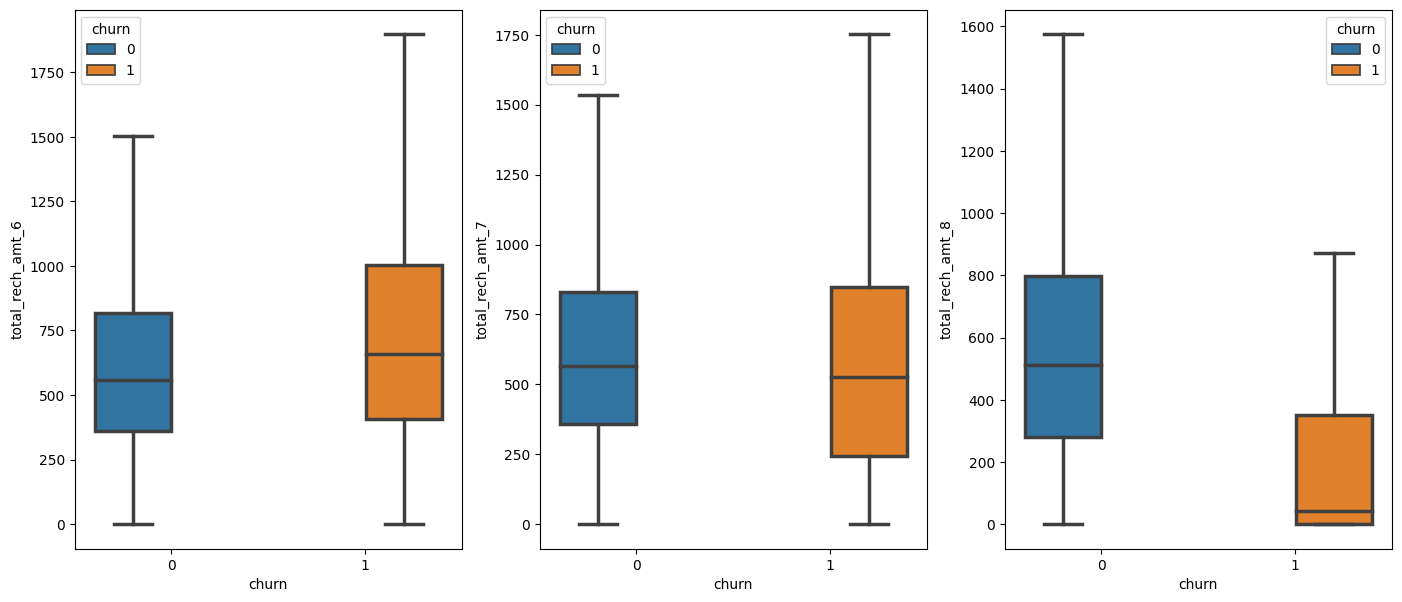

In [256]:
analyze_feature('total_rech_amt')

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,169.10,173.40,166.83,172.1,176.85,171.42
Churned,172.18,159.66,85.54,209.4,227.28,176.90


<Figure size 1700x700 with 0 Axes>

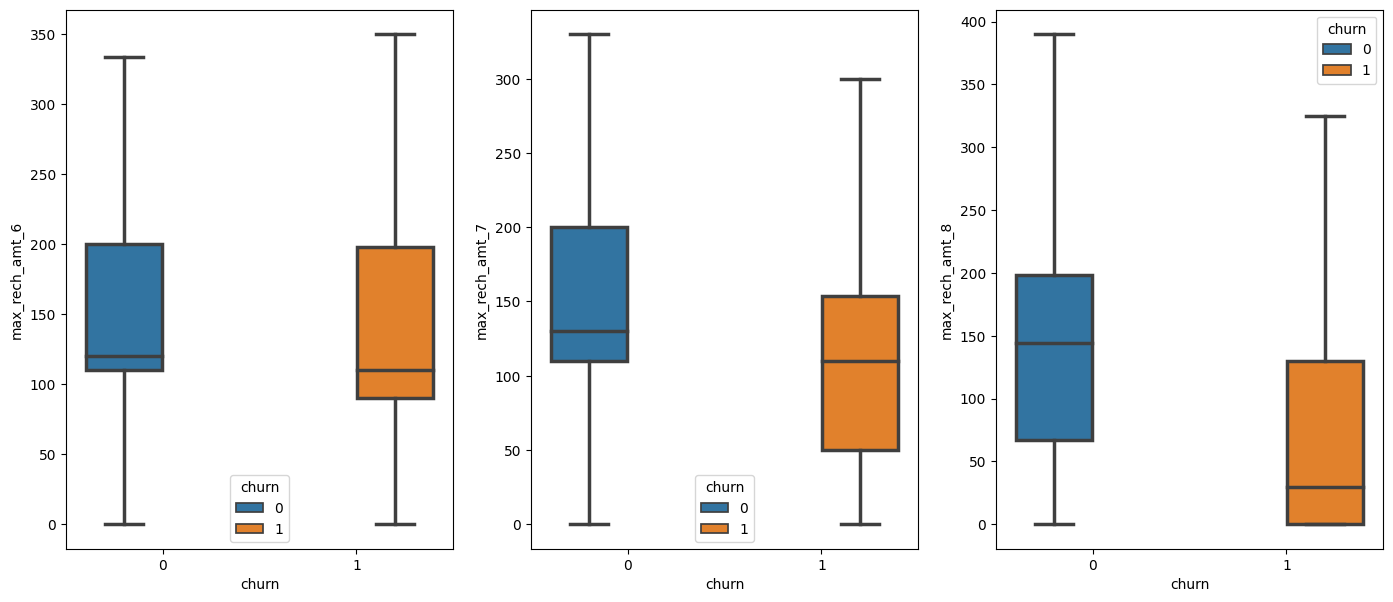

In [257]:
analyze_feature('max_rech_amt')

In [258]:
high_val_cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,

In [259]:
high_val_cust.shape

(29953, 241)

In [260]:
high_val_cust.isnull().sum()

loc_og_t2o_mou           0
std_og_t2o_mou           0
loc_ic_t2o_mou           0
arpu_6                   0
arpu_7                   0
arpu_8                   0
arpu_9                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
onnet_mou_9              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
offnet_mou_9             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_ic_mou_9            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
roam_og_mou_9            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2t_mou_9         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2m_mou_9         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2f_mou_9         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
l

In [261]:
pd.crosstab(high_val_cust.churn, high_val_cust.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.918105,97.114275,97.360704
1,14.081895,2.885725,2.639296


2.10 Handling outliers

In [262]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [263]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [264]:
pd.crosstab(high_val_cust.churn, high_val_cust.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0,25.0,27.0,29.0,30.0,38.0,41.0
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24936,1608,397,183,106,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2361,48,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [265]:
# cap outliers in the numeric columns
high_val_cust[num_cols] = high_val_cust[num_cols].apply(cap_outliers, axis=0)

In [266]:
high_val_cust.shape

(29953, 241)

In [267]:
high_val_cust.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000

In [268]:
#building the model now
# got numeric from
high_val_cust['churn'] = pd.to_numeric(high_val_cust['churn'])

In [269]:
X = high_val_cust.drop("churn", axis = 1)
y = high_val_cust.churn

2.11 Aggregating and groupby data and replacing columns with specific values

In [270]:
# aggregate the categorical variables
high_val_cust.groupby('night_pck_user_6').churn.mean()

night_pck_user_6
-1.0    0.098464
0.0     0.066981
1.0     0.093366
Name: churn, dtype: float64

In [271]:
high_val_cust.groupby('night_pck_user_7').churn.mean()

night_pck_user_7
-1.0    0.114518
0.0     0.055872
1.0     0.061333
Name: churn, dtype: float64

In [272]:
high_val_cust.groupby('night_pck_user_8').churn.mean()

night_pck_user_8
-1.0    0.140819
0.0     0.028857
1.0     0.026393
Name: churn, dtype: float64

In [273]:
high_val_cust.groupby('fb_user_6').churn.mean()

fb_user_6
-1.0    0.098464
0.0     0.077299
1.0     0.066856
Name: churn, dtype: float64

In [274]:
high_val_cust.groupby('fb_user_7').churn.mean()

fb_user_7
-1.0    0.114518
0.0     0.066017
1.0     0.055142
Name: churn, dtype: float64

In [275]:
high_val_cust.groupby('fb_user_8').churn.mean()

fb_user_8
-1.0    0.140819
0.0     0.067766
1.0     0.024341
Name: churn, dtype: float64

In [276]:
# replace categories with aggregated values
mapping = {'night_pck_user_6' : {-1: 0.098464, 0: 0.066981, 1: 0.093366},
           'night_pck_user_7' : {-1: 0.114518, 0: 0.055872, 1: 0.061333},
           'night_pck_user_8' : {-1: 0.098464, 0: 0.028857, 1: 0.026393},
           'fb_user_6'        : {-1: 0.099165, 0: 0.077299, 1: 0.066856},
           'fb_user_7'        : {-1: 0.114518, 0: 0.066017, 1: 0.055142},
           'fb_user_8'        : {-1: 0.140819, 0: 0.067766, 1: 0.024341}
          }

In [277]:
X.replace(mapping, inplace = True)

In [278]:
#datatypes
X[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  29953 non-null  category
 1   night_pck_user_7  29953 non-null  category
 2   night_pck_user_8  29953 non-null  category
 3   fb_user_6         29953 non-null  category
 4   fb_user_7         29953 non-null  category
 5   fb_user_8         29953 non-null  category
dtypes: category(6)
memory usage: 176.4 KB


# Step: 3 Model Building and evaluation.

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [280]:
# Create a StandardScaler and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the training data with the fitted StandardScaler
X_train_scaled = scaler.transform(X_train)

# Create a PCA instance and fit it to the scaled training data
pca = PCA()
pca.fit(X_train_scaled)
# Transform the scaled training data with the fitted PCA
churn_pca = pca.transform(X_train_scaled)

In [281]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.70
1       21.91
2       27.83
3       33.02
4       36.78
5       40.22
6       42.67
7       45.00
8       47.16
9       49.23
10      51.14
11      52.95
12      54.48
13      55.91
14      57.32
15      58.70
16      60.02
17      61.26
18      62.45
19      63.62
20      64.74
21      65.79
22      66.81
23      67.79
24      68.69
25      69.53
26      70.35
27      71.16
28      71.94
29      72.71
30      73.47
31      74.20
32      74.92
33      75.62
34      76.32
35      76.98
36      77.58
37      78.18
38      78.76
39      79.32
40      79.87
41      80.39
42      80.89
43      81.36
44      81.82
45      82.27
46      82.70
47      83.12
48      83.53
49      83.94
50      84.34
51      84.73
52      85.12
53      85.49
54      85.84
55      86.19
56      86.53
57      86.87
58      87.19
59      87.50
60      87.81
61      88.11
62      88.40
63      88.68
64      88.97
65      89.24
66      89.51
67      89.77
68      90.03
69      90.28
70      90.52
71    

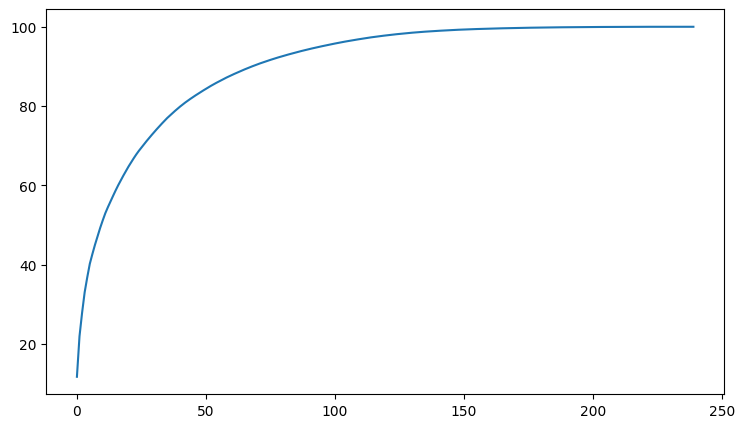

In [282]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [283]:
# Create a PCA instance with the desired number of components and fit it to the scaled data
PCA_VARS = 80
pca = PCA(n_components=PCA_VARS)
X_train_pca = pca.fit_transform(X_train_scaled)

In [284]:
# Create a LogisticRegression instance with class_weight='balanced' and fit it to the PCA-transformed data
logistic = LogisticRegression(class_weight='balanced')
logistic.fit(X_train_pca, y_train)

# Check the score on the training data
train_score = logistic.score(X_train_pca, y_train)

In [285]:
print(train_score)

0.97440349002849


In [286]:
# Predicting churn on test data
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
y_pred = logistic.predict(X_test_pca)

#Creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\nSpecificity: \t", round(specificity, 2))

# Checking area under curve
y_pred_prob = logistic.predict_proba(X_test_pca)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC:\t", round(auc_score, 2))


Confusion Matrix:
[[6677  204]
 [   1  607]]
Sensitivity: 	 1.0 
Specificity: 	 0.97
AUC:	 1.0


3.1 Tuning hyperparameters

In [287]:
# Step 1: Define LogisticRegression with class weights
logistic = LogisticRegression(class_weight={0: 0.1, 1: 0.9})

# Step 2: StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: PCA
pca = PCA()

# Step 4: Creating the grid of parameters
param = {
    'n_jobs': [60, 80,100],
    'C': [0.1, 0.4, 0.5],
    'penalty': ['l1', 'l2'],
    'class_weight': [{0: 0.1, 1: 0.9}]
}
# Step 5: Creating StratifiedKFold
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)


In [288]:
# Step 6: GridSearchCV with Logistic Regression
logistic_regression = LogisticRegression()
model = GridSearchCV(estimator=logistic_regression, param_grid=param, scoring='roc_auc', cv=fold, n_jobs=-1, verbose=1)


In [289]:
# Step 7: Fitting the model
model.fit(pca.fit_transform(X_train_scaled), y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.4, 0.5],
                         'class_weight': [{0: 0.1, 1: 0.9}],
                         'n_jobs': [60, 80, 100], 'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [290]:
# cross validation
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_n_jobs,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.079386,0.003595,0.000000,0.000000,0.1,"{0: 0.1, 1: 0.9}",60,l1,"{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.9}, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,1.878252,0.169813,0.009645,0.001033,0.1,"{0: 0.1, 1: 0.9}",60,l2,"{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.9}, '...",0.996286,0.993151,0.992564,0.993552,0.993736,0.993858,0.001279,7
2,0.046193,0.003693,0.000000,0.000000,0.1,"{0: 0.1, 1: 0.9}",80,l1,"{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.9}, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,2.275880,0.383643,0.013104,0.004351,0.1,"{0: 0.1, 1: 0.9}",80,l2,"{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.9}, '...",0.996286,0.993151,0.992564,0.993552,0.993736,0.993858,0.001279,7
4,0.074544,0.009348,0.000000,0.000000,0.1,"{0: 0.1, 1: 0.9}",100,l1,"{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.9}, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
5,2.374332,0.360966,0.018302,0.007492,0.1,"{0: 0.1, 1: 0.9}",100,l2,"{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.9}, '...",0.996286,0.993151,0.992564,0.993552,0.993736,0.993858,0.001279,7
6,0.090325,0.020641,0.000000,0.000000,0.4,"{0: 0.1, 1: 0.9}",60,l1,"{'C': 0.4, 'class_weight': {0: 0.1, 1: 0.9}, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
7,1.975915,0.288440,0.009012,0.000682,0.4,"{0: 0.1, 1: 0.9}",60,l2,"{'C': 0.4, 'class_weight': {0: 0.1, 1: 0.9}, '...",0.997335,0.994919,0.994400,0.995026,0.995084,0.995353,0.001020,4
8,0.068707,0.005900,0.000000,0.000000,0.4,"{0: 0.1, 1: 0.9}",80,l1,"{'C': 0.4, 'class_weight': {0: 0.1, 1: 0.9}, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,2.577519,0.345159,0.010751,0.000668,0.4,"{0: 0.1, 1: 0.9}",80,l2,"{'C': 0.4, 'class_weight': {0: 0.1, 1: 0.9}, '...",0.997335,0.994919,0.994400,0.995026,0.995084,0.995353,0.001020,4


In [291]:
# best hyperparameters score
model.best_score_

0.9955497068955328

In [292]:
# best hyperparameters
model.best_params_

{'C': 0.5, 'class_weight': {0: 0.1, 1: 0.9}, 'n_jobs': 60, 'penalty': 'l2'}

In [293]:
# Step 10: Predicting churn on test data
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
y_pred = model.predict(X_test_pca)

In [294]:
# Step 11: Creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6637  244]
 [   5  603]]


In [295]:
# Step 12: Checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\nSpecificity: \t", round(specificity, 2))


Sensitivity: 	 0.99 
Specificity: 	 0.96


In [296]:
# Step 13: Checking area under the curve
y_pred_prob = model.predict_proba(X_test_pca)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC:\t", round(auc_score, 3))

AUC:	 0.996


3.3 Applying Random forest model

In [297]:
frt = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

In [298]:
param = {"criterion": ['gini', 'entropy'], "max_features": [1]}
# creating folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)
# Grid search
model = GridSearchCV(estimator=frt, cv=fold, param_grid=param, scoring='roc_auc', n_jobs=-1, verbose=1)

In [299]:
# fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_features': [1]},
             scoring='roc_auc', verbose=1)

In [300]:
# best hyperparameters score
model.best_score_

0.9991696142401498

In [301]:
# best hyperparameters
model.best_params_

{'criterion': 'gini', 'max_features': 1}

In [302]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6868   13]
 [  56  552]]
Sensitivity: 	0.91
Specificity: 	1.0
AUC:    	 1.0


 random forest is overfitting. So going with logistic and PCA

In [303]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))
rand_frt_model = RandomForestClassifier(n_estimators=100, max_features = max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=20, verbose=1)

In [304]:
# fiting the model
rand_frt_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=15,
                       oob_score=True, random_state=20, verbose=1)

In [305]:
# checking OOB score
rand_frt_model.oob_score_

0.9995993589743589

In [306]:
# predicting churn on test data
y_pred = rand_frt_model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = rand_frt_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6881    0]
 [   0  608]]
Sensitivity: 	1.0
Specificity: 	1.0
ROC:    	 1.0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


3.4 Selecting top features which is strong indicator of churn.

In [307]:
# predictors
feature = high_val_cust.drop('churn', axis=1).columns

In [308]:
# feature_importance
importance = rand_frt_model.feature_importances_

In [309]:
# creating the dataframe
feature_imp = pd.DataFrame({'variables': feature, 'importance_percentage': importance*100})
feature_imp = feature_imp[['variables', 'importance_percentage']]

In [310]:
# sorting the features
feature_imp = feature_imp.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_imp.importance_percentage.sum())
feature_imp

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,total_ic_mou_9,1.543261e+01
1,loc_ic_t2m_mou_9,1.261964e+01
2,total_og_mou_9,6.670714e+00
3,loc_og_t2m_mou_9,6.621007e+00
4,loc_ic_t2t_mou_9,6.612980e+00
5,total_rech_amt_9,6.141361e+00
6,loc_ic_mou_9,4.724793e+00
7,std_og_mou_9,4.252146e+00
8,loc_og_t2t_mou_9,3.443955e+00
9,loc_og_mou_9,3.439832e+00


In [311]:
# extract top 'n' features
top_features = feature_imp.variables[0:50]

In [312]:
print(top_features)

0          total_ic_mou_9
1        loc_ic_t2m_mou_9
2          total_og_mou_9
3        loc_og_t2m_mou_9
4        loc_ic_t2t_mou_9
5        total_rech_amt_9
6            loc_ic_mou_9
7            std_og_mou_9
8        loc_og_t2t_mou_9
9            loc_og_mou_9
10         max_rech_amt_9
11           std_ic_mou_9
12       std_ic_t2m_mou_9
13       loc_ic_t2f_mou_9
14                 arpu_9
15           offnet_mou_9
16           loc_ic_mou_8
17       std_og_t2t_mou_9
18       std_og_t2m_mou_9
19     av_rech_amt_data_9
20      total_rech_data_9
21              fb_user_9
22       loc_ic_t2m_mou_8
23           spl_og_mou_9
24       total_rech_num_9
25        max_rech_data_9
26                 arpu_8
27              arpu_2g_9
28            onnet_mou_9
29            vol_2g_mb_9
30       night_pck_user_9
31              arpu_3g_9
32        count_rech_2g_9
33       loc_ic_t2t_mou_8
34         total_og_mou_8
35          roam_ic_mou_9
36       loc_og_t2m_mou_8
37     last_day_rch_amt_9
38          

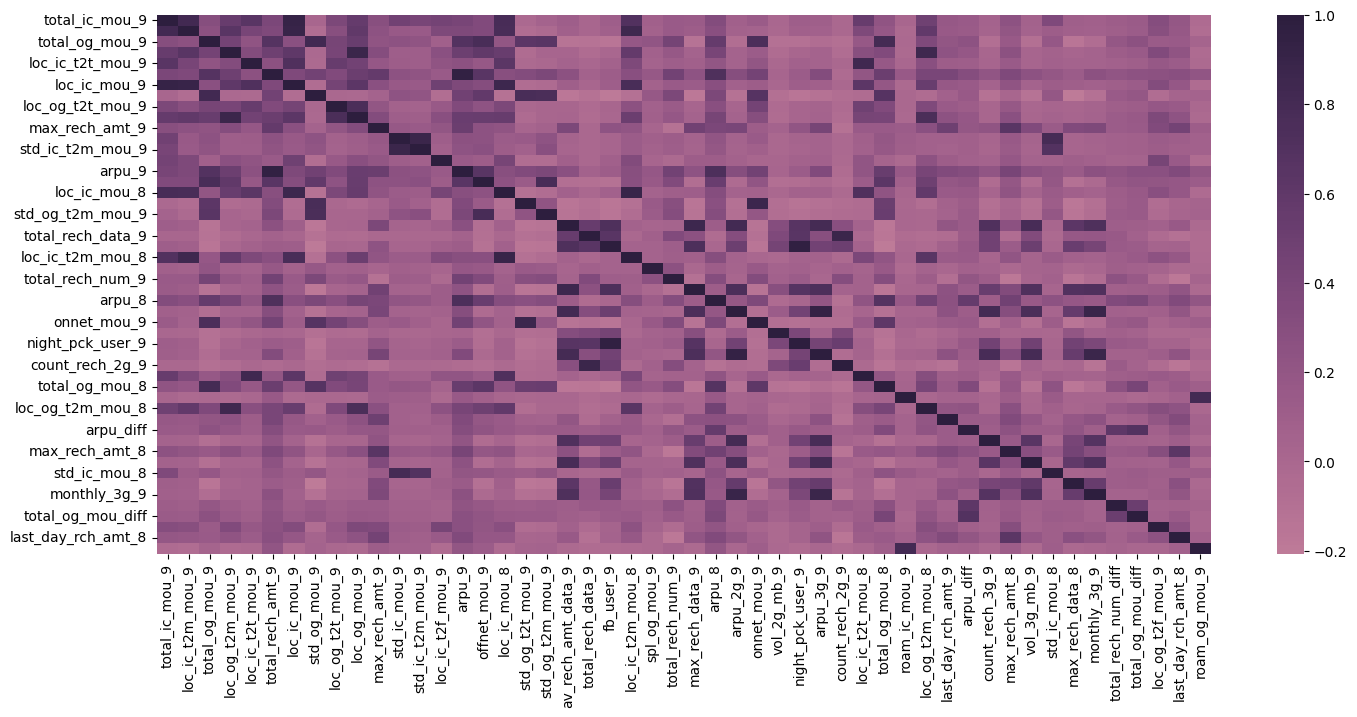

In [313]:
# plot feature correlation
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0,cmap= sns.cubehelix_palette(200))
plt.show()

In [314]:
# Selecting features that are relevent
top_features = ['total_ic_mou_8',
                'total_rech_amt_diff',
                'total_og_mou_8', 'arpu_8',
                'roam_ic_mou_8', 'roam_og_mou_8',
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [315]:
# Step 1: StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 2: Logistic Regression with class weights
logistic = LogisticRegression(class_weight={0: 0.1, 1: 0.9})

# Step 3: Creating the grid of hyperparameters
param = {
    'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
    'penalty': ['l1', 'l2']
}

# Step 4: Creating StratifiedKFold
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Step 5: GridSearchCV with Logistic Regression
model = GridSearchCV(estimator=logistic, param_grid=param, scoring='roc_auc', cv=fold, n_jobs=-1, verbose=1)

# Step 6: Fitting the model
model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 0.1, 1: 0.9}),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [316]:
# Step 7: Best hyperparameters score
best_score = model.best_score_

# Step 8: Best hyperparameters
best_params = model.best_params_

# Step 9: Predicting churn on test data
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

# Step 10: Creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[5795 1086]
 [ 120  488]]


In [317]:
# Step 11: Checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\nSpecificity: \t", round(specificity, 2))

# Step 12: Checking area under the curve
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC: \t", round(roc_auc, 2))

# Step 13: Accessing the logistic regression model
logistic_model = model.best_estimator_

Sensitivity: 	 0.8 
Specificity: 	 0.84
ROC AUC: 	 0.88


In [318]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [319]:
# coefficients
coefficient = logistic_model.coef_.reshape((9, 1)).tolist()
coefficient = [val for sublist in coefficient for val in sublist]
coefficient = [round(coefficient, 3) for coefficient in coefficient]
logistic_feature = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_feature)

In [320]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.51938,-1.149391,-0.70291,-1.52744,0.236451,-0.020204,0.212363,0.062618,-0.791111,0.941812


In our examination, we have identified key factors that influence churn. These factors include:

total_ic_mou_8 (Total incoming call: Minutes of usage in the action phase)
total_rech_amt_diff (Total recharge amount difference)
total_og_mou_8 (Total outgoing call: Minutes of usage in the action phase)
arpu (Average revenue per user)
roam_ic_mou_8 (Roaming incoming call: Minutes of usage in the action phase)
roam_og_mou_8 (Roaming outgoing call: Minutes of usage in the action phase)
std_ic_mou_8 (STD incoming call: Minutes of usage in the action phase)
std_og_mou_8 (STD outgoing call: Minutes of usage in the action phase)
av_rech_amt_data_8 (Average recharge amount in the action phase)

# Ways to Minimize Churn:

Offer tailored discounts to customers based on their usage patterns.

Introduce extra internet services as part of recharge packages.

Engage in personalized conversations with customers to meet their specific needs.

Reduce tariffs for data usage and improve 2G coverage in areas without 3G access.

Extend the reach of the 3G network to areas currently lacking 3G connectivity.